In [1]:
import pandas_datareader as pdr
key="0339bf014841156ce818766778d4d7e194115107"

In [2]:
df = pdr.get_data_tiingo("AAPL",api_key=key)

C:\Users\Geomatics\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv("AAPL.csv")

In [4]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-06-05 00:00:00+00:00  153.93  154.45  153.46  154.34  24803858   
       2017-06-06 00:00:00+00:00  154.45  155.81  153.78  153.90  26249630   
       2017-06-07 00:00:00+00:00  155.37  155.98  154.48  155.02  20678772   
       2017-06-08 00:00:00+00:00  154.99  155.54  154.40  155.25  20771367   
       2017-06-09 00:00:00+00:00  148.98  155.19  146.02  155.19  64882700   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-06-05 00:00:00+00:00  36.423468  36.546512  36.312255  36.520483   
       2017-06-06 00:00:00+00:00  36.546512  36.868320  36.387974  36.416369   
       2017-06-07 00:00:00+00:00  36.764206  36.908546  36.553611  36.681388   
       2017-06-08 00:00:00+00:00  36.674289  36.804432  36.534681  36.735811   
       2017-06-09 00:00:00+00:00  35.252181  36.721614  34.551775  36.721614   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-06-05 00:00:00+00:00   99215432      0.0          1.0  
       2017-06-06 00:00:00+00:00  104998520      0.0          1.0  
       2017-06-07 00:00:00+00:00   82715088      0.0          1.0  
       2017-06-08 00:00:00+00:00   83085468      0.0          1.0  
       2017-06-09 00:00:00+00:00  259530800      0.0          1.0

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-06-05 00:00:00+00:00  153.93  154.45  153.46  154.34  24803858   
       2017-06-06 00:00:00+00:00  154.45  155.81  153.78  153.90  26249630   
       2017-06-07 00:00:00+00:00  155.37  155.98  154.48  155.02  20678772   
       2017-06-08 00:00:00+00:00  154.99  155.54  154.40  155.25  20771367   
       2017-06-09 00:00:00+00:00  148.98  155.19  146.02  155.19  64882700   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-06-05 00:00:00+00:00  36.423468  36.546512  36.312255  36.520483   
       2017-06-06 00:00:00+00:00  36.546512  36.868320  36.387974  36.416369   
       2017-06-07 00:00:00+00:00  36.764206  36.908546  36.553611  36.681388   
       2017-06-08 00:00:00+00:00  36.674289  36.804432  36.534681  36.735811   
       2017-06-09 00:00:00+00:00  35.252181  36.721614  34.551775  36.721614   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-06-05 00:00:00+00:00   99215432      0.0          1.0  
       2017-06-06 00:00:00+00:00  104998520      0.0          1.0  
       2017-06-07 00:00:00+00:00   82715088      0.0          1.0  
       2017-06-08 00:00:00+00:00   83085468      0.0          1.0  
       2017-06-09 00:00:00+00:00  259530800      0.0          1.0

In [6]:
df1 =  df.reset_index()['close']

df1.head()

0    153.93
1    154.45
2    155.37
3    154.99
4    148.98
Name: close, dtype: float64

In [7]:
df1.shape

(1259,)

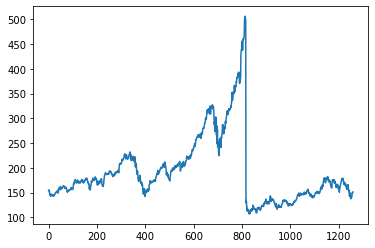

In [8]:
import matplotlib.pyplot as plt 
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(1259, 1)

In [12]:
training_size = int(len(df1)*0.65) 
test_size = len(df1)- training_size
train_data, test_data = df1[0:training_size:,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(818, 441)

In [14]:
import numpy 
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)
        
        

In [15]:
time_step=100
X_train, Y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [16]:
X_train

array([[0.11794615, 0.11924859, 0.12155291, ..., 0.12375704, 0.12355667,
        0.12588604],
       [0.11924859, 0.12155291, 0.12060113, ..., 0.12355667, 0.12588604,
        0.1241578 ],
       [0.12155291, 0.12060113, 0.1055479 , ..., 0.12588604, 0.1241578 ,
        0.12666249],
       ...,
       [0.38980589, 0.38219161, 0.39882279, ..., 0.99333751, 0.98299311,
        1.        ],
       [0.38219161, 0.39882279, 0.40363181, ..., 0.98299311, 1.        ,
        0.98484659],
       [0.39882279, 0.40363181, 0.41680651, ..., 1.        , 0.98484659,
        0.98281778]])

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [19]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,Y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 262ms/step - loss: 0.0421 - val_loss: 0.0045
Epoch 2/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0111 - val_loss: 0.0089
Epoch 3/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0048 - val_loss: 9.1387e-04
Epoch 4/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0032 - val_loss: 7.0129e-04
Epoch 5/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0031 - val_loss: 4.9187e-04
Epoch 6/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0026 - val_loss: 9.7075e-04
Epoch 7/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0027 - val_loss: 3.8075e-04
Epoch 8/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0024 - val_loss: 4.0174e-04
Epoch 9/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0026 - val_loss: 3.5144e-04
Epoch 10/100
12/12 [==============================] - 2s 144ms/

12/12 [==============================] - 2s 130ms/step - loss: 0.0020 - val_loss: 2.3363e-04
Epoch 79/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0018 - val_loss: 1.7642e-04
Epoch 80/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0018 - val_loss: 1.8321e-04
Epoch 81/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0017 - val_loss: 1.7877e-04
Epoch 82/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0018 - val_loss: 2.1057e-04
Epoch 83/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0017 - val_loss: 1.7114e-04
Epoch 84/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0018 - val_loss: 1.5829e-04
Epoch 85/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0018 - val_loss: 1.9267e-04
Epoch 86/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0020 - val_loss: 1.5936e-04
Epoch 87/100
12/12 [==============================] - 2s 13

In [22]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [23]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 24ms/step


In [24]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)    

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

230.7147602042398

In [26]:
math.sqrt(mean_squared_error(y_test,test_predict))

144.83055878004998

In [27]:
len(train_predict)

717

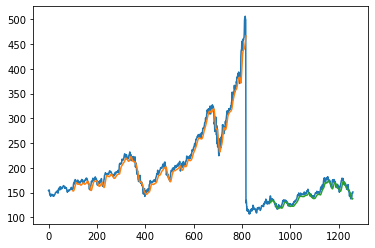

In [28]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]  = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,: ] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
trainPredictPlot.shape

(1259, 1)

In [30]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [32]:
temp_input


[0.1636819035691922,
 0.17092047589229803,
 0.17204758922980584,
 0.1636819035691922,
 0.1658860363180964,
 0.15769567939887286,
 0.1487539135879774,
 0.1444458359423919,
 0.13918597370068875,
 0.13720726361928615,
 0.1325986224170319,
 0.13237319974953032,
 0.13119599248591102,
 0.15902316844082653,
 0.17016906700062612,
 0.16974326862867878,
 0.17282404508453347,
 0.165460237946149,
 0.16418284283030676,
 0.16235441452723853,
 0.17029430181590482,
 0.17392611145898557,
 0.16350657482780212,
 0.1547902316844082,
 0.15539135879774574,
 0.16518472135253592,
 0.1645835942391985,
 0.15539135879774574,
 0.15143393863494048,
 0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.1

In [33]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print(f"{i} day input {x_input}" )
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        
        y_hat = model.predict(x_input,verbose=1)
        print( f"{i} day output {y_hat}" )
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(y_hat.tolist())
        i+=1
        
    else:
        x_input = x_input.reshape((1,n_steps,1))
        y_hat = model.predict(x_input,verbose=1)
        print(y_hat[0])
        temp_input.extend(y_hat[0].tolist())
        print(len(temp_input))
        lst_output.extend(y_hat.tolist())
        i += 1
print(lst_output)

1/1 [==============================] - 0s 23ms/step
[0.08369023]
101
1 day input [0.17092048 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391
 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599
 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284
 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136
 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498
 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391
 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991
 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835 0.14662492
 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387
 0.17765811 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021
 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995
 0.14584847 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318
 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721
 0.14822793 0.12505949 0.12633688 0.11326237 0.119

1/1 [==============================] - 0s 24ms/step
7 day output [[0.08245101]]
8 day input [0.13918597 0.13720726 0.13259862 0.1323732  0.13119599 0.15902317
 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284 0.16235441
 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136 0.16518472
 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498 0.14001252
 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391 0.14108954
 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991 0.1096556
 0.1208516  0.13212273 0.13470257 0.14311835 0.14662492 0.15524108
 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387  0.17765811
 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021 0.16355667
 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847
 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463
 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793
 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775
 0.10086412 0.09693175 0.10619912 0.08

1/1 [==============================] - 0s 24ms/step
14 day output [[0.06864151]]
15 day input [0.16974327 0.17282405 0.16546024 0.16418284 0.16235441 0.1702943
 0.17392611 0.16350657 0.15479023 0.15539136 0.16518472 0.16458359
 0.15539136 0.15143394 0.14396994 0.13332498 0.14001252 0.14529743
 0.1459737  0.14116468 0.14958046 0.14875391 0.14108954 0.13139637
 0.12673763 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516
 0.13212273 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226
 0.16839073 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327
 0.16899186 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204
 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441
 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412
 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534
 0.08395742 0.08435817 0.09252348 0.10

1/1 [==============================] - 0s 25ms/step
21 day output [[0.05547466]]
22 day input [0.16350657 0.15479023 0.15539136 0.16518472 0.16458359 0.15539136
 0.15143394 0.14396994 0.13332498 0.14001252 0.14529743 0.1459737
 0.14116468 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763
 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166
 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.08369023 0.08635911 0.08774094 0.

1/1 [==============================] - 0s 24ms/step
28 day output [[0.04360796]]
29 day input [0.14396994 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468
 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851
 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257
 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073 0.17001879
 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186 0.17933626
 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166 0.15233563
 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861 0.14922981
 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675 0.12726362
 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688 0.11326237
 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175 0.10619912
 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817
 0.09252348 0.107201   0.10519724 0.10487163 0.11113338 0.08369023
 0.08635911 0.08774094 0.08793614 0.08723615 0.08594227 0.08429305
 0.08245101 0.08051485 0.07853883 0

In [40]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)


In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)


1259

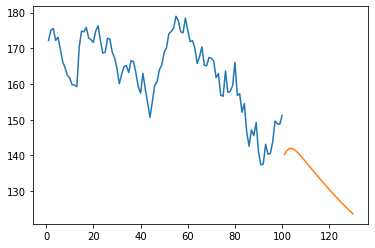

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

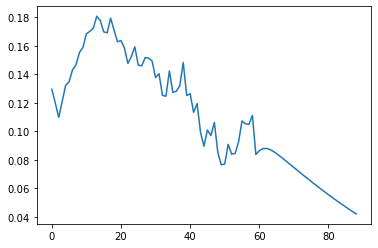

In [47]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3 = scaler.inverse_transform(df3).tolist()


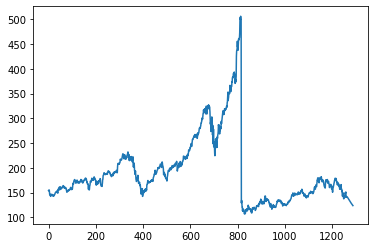

In [49]:
plt.plot(df3)